In [4]:
%matplotlib inline
import pandas
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <font color='red'>RED</font>, <font color='blue'>BLUE</font>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <font color='purple'>PURPLE</font>, <font color='orange'>ORANGE</font>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

# Questions for Investigation

## Question 1.1 - What is our independent variable? 

The independent variable is the choice of whether a word and its color is congruent or incongruent.

## Question 1.2 - What is our dependent variable?

The dependent variable is the time (in seconds) it takes to correctly identify the color of the word.

## Question 2.1 - What is an appropriate set of hypotheses for this task?

**Null Hypothesis** Under the null hypothesis we generally assume that we observe no effect, or no change. So the null hypothesis is that there is no improvement in the time it takes to correctly identify the color of the word for both the congruent and incongruent samples.
$$H_0: \mu_i - \mu_c \le 0$$

**Alternative Hypothesis** Under the alternative hypothesis we assume that the incongruent samples are more difficult to determine the correct color as quickly, due to the mismatch of color and word spelled. There is no reason to assume this would actually be easier to read than the congruent samples, therefore we are going to perform a one tailed test.
$$H_a: \mu_i - \mu_c \gt 0$$

As is customary we'll use $\alpha=0.05$.


## Question 2.2 - What kind of statistical test do you expect to perform?

As mentioned above, this should be a one-tailed test in the positive direction, due to the expectation that having incongruent samples will make discerning the correct color more difficult. There is no reason to suspect that it will make the process easier. 

As per the description of the provided data, it would appear that the congruent and incongruent tests were both done on the same set of people. This means that a dependent test is in order, as opposed to an independent test. Also, since we are comparing two sets of samples, and do not have access to population data, we are going to perform a t-test. 

## Question 3 - Report Descriptive Statistics

In [5]:
df = pandas.read_csv('stroopdata.csv')
n = len(df['Congruent'])

First, these data sets are not expected to be centered around zero mean. Let's normalize it, in the mean sense and under the null hypothesis, by computing the difference of the incongruent to congruent samples. Then we can measure the mean and median values of each of the samples.

In [6]:
df['Delta'] = df['Incongruent'] - df['Congruent']
means = df.mean()
print(means)

Congruent      14.051125
Incongruent    22.015917
Delta           7.964792
dtype: float64


$$\overline{x}_c = 14.051$$
$$\overline{x}_i = 22.016$$
$$\overline{x}_d = 7.965$$

In [7]:
print(df.median())

Congruent      14.3565
Incongruent    21.0175
Delta           7.6665
dtype: float64


The standard deviation of each data set should also be computed. Note that this method uses Bessel's correction, as required since this is the standard deviation of a sample, and not the population.

In [8]:
devs = df.std()
print devs

Congruent      3.559358
Incongruent    4.797057
Delta          4.864827
dtype: float64


$$S_c = 3.559$$
$$S_i = 4.797$$
$$S_d = 4.865$$

## Question 4 - Plot the Data

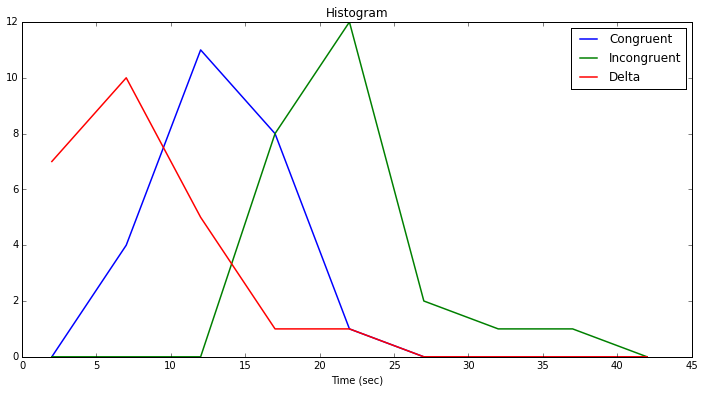

In [9]:
def plothist(x):
    inbins = np.arange(0, 10) * 5
    hist, bins = np.histogram(x, inbins)
    center = (bins[:-1] + bins[1:]) / 2
    plt.plot(center, hist, linewidth=1.5)
    plt.title('Histogram')
    plt.xlabel('Time (sec)')
    
plt.figure(figsize=(12,6), dpi=1200)
plothist(df['Congruent'])
plothist(df['Incongruent'])
plothist(df['Delta'])
plt.legend(['Congruent', 'Incongruent', 'Delta'])
plt.show()

Histograms are normally plotted using bar charts. However, a line plot is used here in order to observe the histogram of each set of data on the same chart. 

It's clear that this is a small sample size. Typically smaller sizes are possible with dependent samples tests, but it makes meaningful visualization of the histogram challenging. Any more bins and we start getting some bins with no counts and the shape is distorted. Any fewer bins and the histogram provides little value. 

There are a few salient points about the histograms worth mentioning. It's interesting to note that the subtraction of the incongruent and congruent samples produces a resulting histogram that is entirely positive. Under the null hypothesis we would expect it to be zero mean. But we'll have to test the significance of the result later. The delta histogram especially seems to have a positive skew, based on the histogram and the mean to median ratio.

## Question 5 - Perform the Statistical Test and Interpret the Results

### Compute t-critical

In [23]:
from scipy.stats import t
dof = n - 1
alpha = 0.05
t_critical = -t.ppf(alpha, dof)
print("Number of samples = {0}".format(len(df['Congruent'])))
print("Degrees of freedom = {0}".format(dof))
print("Alpha = {0}".format(alpha))
print("Critical value = {:.3f}".format(t_critical))

Number of samples = 24
Degrees of freedom = 23
Alpha = 0.05
Critical value = 1.714


Since there are 24 measurements in each sample that means that there are 23 *degrees of freedom*.

For a dependent samples, one-tailed (positive) t-test, with $\alpha=0.05$, and 23 degrees of freedom, that produces the following *critical value*:

$$t_{critital} = 1.714$$

### Compute the Standard Error

In [12]:
se = devs['Delta'] / np.sqrt(n)
print("Standard error = {0:.3f}".format(se))

Standard error = 0.993


$$SE = \frac{S_d}{\sqrt{n}} = \frac{4.865}{\sqrt{24}} = 0.993$$

### Compute the t-statistic

The *t-statistic* is given by:

$$t_{statistic} = \frac{\overline{x}_d}{SE} = \frac{\overline{x}_d}{\frac{S_d}{\sqrt{n}}}$$

In [14]:
t_stat = means['Delta'] / se
print("T-statistic = {0:.3f}".format(t_stat))

T-statistic = 8.021


$$t_{statistic} = 8.021$$

### Decision

Since $t_{statistic} > t_{critical}$, or $8.021 > 1.714$, we can **reject the null hypothesis**. We therefore know $p < 0.05$, but let's compute the actual *p-value*.

### Compute the p-value

In [36]:
from scipy.stats import ttest_rel, t
rv = t(dof)
print("one tailed probability = p = {0:3g}".format(rv.cdf(-t_stat)))

one tailed probability = p = 2.0515e-08


We can also use the *cumulative distribution function* to compute the p-value, but we must invert the sign since the CDF naturally integrates from lower values to higher values. 

$$p = 2.05 \times 10^{-8}$$

For verification let's use the built in python tools to compute the t-statistic and p-value of our two data sets. This code computes the delta as the first parameter minus the second one. Note that the p-value returned is two-tailed. Therefore, we must take half of the resulting p-value for a one-tailed test. We again have to use the negative of the t-statistic because the CDF integrates from the left.

In [37]:
from scipy.stats import ttest_rel, t
tst, p = ttest_rel(df['Incongruent'],df['Congruent'])
rv = t(dof)
print("scipy.stats t-statistic = {0:.3f}".format(tst))
print("two tailed probability divided by two = {0:3g}".format(p/2.0))
print("one tailed probability = {0:3g}".format(rv.cdf(-tst)))

scipy.stats t-statistic = 8.021
two tailed probability divided by two = 2.0515e-08
one tailed probability = 2.0515e-08


### Compute Cohen's D

In [13]:
print("Cohen's D = {0:.3f}".format(means['Delta']/devs['Delta']))

Cohen's D = 1.637


*Cohen's D* is given by:

$$d = \frac{\overline{x}_d}{S_d} = \frac{7.965}{4.865} = 1.637$$

### Correlation

The correlation coefficient is given by:

$$r^2 = \frac{t^2}{t^2 + dof}$$

In [35]:
corr_coef = t_stat**2 / (t_stat**2 + dof)
print("r^2 = {0:.2f}".format(corr_coef))

r^2 = 0.74


$$r^2 = .74$$

### Confidence Interval

The confidence interval is given by:

$$CI = \overline{x}_d \pm t_{critical} * \frac{S_d}{\sqrt{n}}$$

In [32]:
ci = dict(zip(['lb', 'ub'], means['Delta'] + t_critical * se * np.array([-1, 1])))
print("Confidence Interval Lower Bound = {0:.2f}".format(ci['lb']))
print("Confidence Interval Lower Bound = {0:.2f}".format(ci['ub']))

Confidence Interval Lower Bound = 6.26
Confidence Interval Lower Bound = 9.67


$$CI = (6.26, 9.67)$$

## Summary

The Stroop effect is the observation that determining the color of a word is easier when the color matches the word spelled out (congruent). We assumed the null hypothesis of no mismatch existing, or of the times improving with the incongruent sample. They alternative hypothesis was that the times of the incongruent sample was greater than that of the congruent sample. We computed the difference between the incongruent and congruent samples, and computed a mean value of 7.96 and a standard deviation of 4.86. A dependent sample, one tailed t-test was performed on the data with, with the results given as $t(23) = 8.02, p=.00$, one-tailed. The confidence interval is $95\% \: CI = (6.26, 9.67)$. Cohen's D is given as $d=1.64$ and the correlation coefficient is $r^2 = .74$. Given these results we reject the null hypothesis.

## Question 6.1 (Optional) - What is Responsible for the Stroop Effect?

There are multiple hypothesis of why this effect might be in place. The [wikipedia page](https://en.wikipedia.org/wiki/Stroop_effect#Theories) has a good section summarizing some of these hypothesis. Perhaps we have learned to read a word faster than recognizing the color of a word. This means that we must override what we've read to make the right choice when there is a mismatch. Alternatively, it might be more difficult to recognize color than read clear words. One of the most favored explanations is that recognizing and labelling colors isn't an automatic process of the brain, whereas reading words is. 

## Question 6.2 (Optional) - Can you think of an alternative or similar task that would result in a similar effect?

This reminded me of the [implicit bias](https://implicit.harvard.edu/implicit/takeatest.html) project. This consists of categorizing faces as either darker skinned or lighter skinned, and also making an association of "good" or "bad" words with the faces. The association of good and bad words is changed in two of the tests, to correspond to different races. Based on the time it takes to match the words and skin tone it is possible to detect and show what may be an implicit bias.